# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 1
---



# Φιλίππου Μιχαήλ 
# el15756

Κλάση Visualization


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
from scipy import spatial
import math
import random


class visualization:
    def __init__(self, S, F):
        '''
          Η μέθοδος αυτή αρχικοποιεί ένα αντικείμενο τύπου visualization.
          Είσοδος: 
          -> S: το σημείο εκκίνησης της αναζήτησης
          -> F: το σημείο τερματισμού
        '''
        self.S = S
        self.F = F
        self.images = []
    
    def draw_step(self, grid, frontier, expanded_nodes):
        '''
          Η συνάρτηση αυτή καλείται για να σχεδιαστεί ένα frame στο animation (πρακτικά έπειτα από την επέκταση κάθε κόμβου)
          Είσοδος: 
          -> grid: Ένα χάρτης τύπου grid
          -> frontier: Μια λίστα με τους κόμβους που ανήκουν στο μέτωπο της αναζήτησης
          -> expanded_nodes: Μια λίστα με τους κόμβους που έχουν ήδη επεκταθεί
          Επιστρέφει: None
          Η συνάρτηση αυτή πρέπει να καλεστεί τουλάχιστον μια φορά για να μπορέσει να σχεδιαστεί ένα animation (πρεπεί το animation να έχει τουλάχιστον ένα frame).
        '''
        image = np.zeros((grid.N, grid.N, 3), dtype=int)
       # iamge = np.random.binomial(1, p) #randomply produces 1 or 0
        image[grid.grid == 0] = [255, 255, 255]
        image[grid.grid == 1] = [0, 0, 0]
        
        for node in expanded_nodes:
            image[node] = [0, 0, 128]

        for node in frontier:
            image[node] = [0, 225, 0]

        image[self.S] = [50, 168, 64]
        image[self.F] = [168, 50, 50]
        self.images.append(image)
    
    def add_path(self, path):
        '''
          Η συνάρτηση αυτή προσθέτει στο τελευταίο frame το βέλτιστο μονοπάτι.
          Είσοδος:
          -> path: Μια λίστα η όποια περιέχει το βέλτιστο μονοπάτι (η οποία πρέπει να περιέχει και τον κόμβο αρχή και τον κόμβο στόχο)
          Έξοδος: None
        '''
        for n in path[1:-1]:
            image = np.copy(self.images[-1])
            image[n] = [66, 221, 245]
            self.images.append(image)
        
    def create_gif(self, fps = 30, repeat_delay = 2000):
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        fig = plt.figure()
        plt.axis('off')
        ims = []
        for img in self.images:
            img = plt.imshow(img)
            ims.append([img])
        ani = animation.ArtistAnimation(fig, ims, interval=1000//fps, blit=True, repeat_delay= repeat_delay)
        plt.close(fig)
        return ani
        
    def save_gif(self, filename, fps = 30):
        '''
            Η συνάρτηση αυτή ξαναδημιουργεί και αποθηκεύει το animation σε ένα αρχείο.
            Είσοδος:
            -> Το όνομα του αρχείου με κατάληξη .gif
            Έξοδος: (None)
        '''
        ani = self.create_gif(fps)
        writer = PillowWriter(fps= fps)
        ani.save(filename, writer=writer)

    def show_gif(self, fps= 30, repeat_delay = 2000):
        '''
            Η συνάρτηση αυτή εμφανίζει inline το animation.
            Είσοδος:
            -> fps: τα frames per second
            Έξοδος: Το αντικείμενο που παίζει το animation
            Exceptions: EmptyStackOfImages αν το animation δεν έχει ούτε ένα frame, δηλαδή αν η draw_step δεν έχει καλεστεί ποτέ.
        '''
        ani = self.create_gif(fps, repeat_delay)
        # return HTML(ani.to_html5_video())
        return HTML(ani.to_jshtml())

    def show_last_frame(self):
        '''
            Η μέθοδος αυτή εμφανίζει inline το τελευταίο frame που έχει δημιουργηθεί.
            Είσοδος:
            Έξοδος: Το αντικείμενο που εμφανίζει την εικόνα.
            Exceptions: EmptyStackOfImages αν το animation δεν έχει ούτε ένα frame, δηλαδή αν η draw_step δεν έχει καλεστεί ποτέ.
        '''
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        else:
            plt.imshow(self.images[-1])


class EmptyStackOfImages(Exception):
    pass

## Μέρος Α: Κατασκευή χάρτη με διαφορετική πυκνότητα εμποδίων

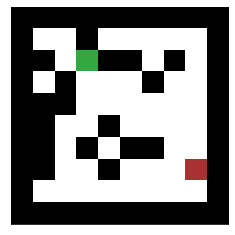

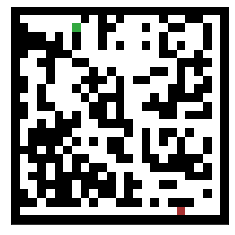

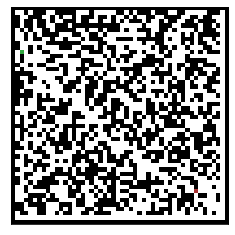

In [2]:
%matplotlib inline
import numpy as np
from random import shuffle, uniform
import matplotlib.pyplot as plt
import time
import sys
from queue import * 


def cmp(a, b):
    return (a > b) - (a < b) 

  



class grid:
    '''
    adjacentObst(node):
    *gets : node (tuple)
    *returns: list of tuples with with obstacles of node
    '''
    def adjacentObst(self, node):
        adjacent_nodes = []
        for n in (node[0] - 1, node[1]), (node[0] + 1, node[1]), (node[0], node[1] - 1), (node[0], node[1] + 1):
            if self.grid[n] == 1: #tsekarw ta empodia anti gia ta eleuthera tetragwna
                adjacent_nodes.append(n)
        return adjacent_nodes    
    
    
    def adjacent(self, node):
        adjacent_nodes = []
        for n in (node[0] + 1, node[1]), (node[0] - 1, node[1]), (node[0], node[1] + 1), (node[0], node[1] - 1): #[(1,0),(-1,0),(0,1),(0,-1)]:
            if self.grid[n] == 0: #tsekarw ta eleuthera tetragwna
                adjacent_nodes.append(n)
        return adjacent_nodes    
    
    '''
    delution(node.N,S,F):
    *gets:
        N:dimensions
        S:Starting point
        F:Final point
        
    *returns:
        Randomly removes Obstacles of the grid
        but assuring that from S and from F the area 
        around them is accessible
    '''
    def delution(self,node,N,S,F):
        #first of all we delute the area near S and F
        if ( cmp(node,S) == 0 or cmp(node,F) == 0 ):
            if (node[0] > 2):
                self.grid[node[0] -1][node[1]] = 0
            if (node[1] > 2):       
                self.grid[node[0]][node[1]-1] = 0
            self.grid[node[0]][node[1]+1] = 0
            self.grid[node[0]+1][node[1]] = 0
            
        l = self.adjacentObst(node)
        p1 = np.random.randint(-1,len(l))
        for i in range (0,p1):
            a = l.pop()
            #leaving grid untouchable
            if (a[1] == 0  ):
                continue
            else:
                self.grid[a[0]][a[1]] = 0
                 
                
    #Ranom bfs returns list with sortest path
    def RandBfs(self,prob):
        visited = np.zeros((self.N,self.N), dtype = np.bool)
        dict = {}
        dict[S] = (-1,-1)
        q = Queue()
        flag = False
        q.put(S)
        visited[S[0]][S[1]] = True
        while ( q.qsize() > 0 and flag == False ):
            s = q.get()
            for i in self.adjacent(s):
                if ( cmp(i,F) == 0 ):
                    visited[i[0]][i[1]] = True
                    dict[i] = s
                    flag = True
                elif (visited[i[0]][i[1]] == False):
                    if ( prob > random.uniform(0,0.82) ):
                        visited[i[0]][i[1]] = True
                        dict[i] = s
                        q.put(i)    
        target = F
        lisi = [target]
        while dict[target] != (-1,-1):
            target = dict[target]
            lisi.append(target)
        return lisi 
    
    
    def Path2(self):
        cur = S
        res = [cur]
        while(not cmp(cur,F) == 0 ):
            a = np.random.binomial(1,0.5)
            if ( cur[0] + 1 == N - 1 ):
                while (cur[1] < N -1 ):
                    cur = (cur[0] ,cur[1] + 1)
                    res.append(cur)
                    return res
                    
            elif ( cur[1] + 1 == N-1  ):
                  while (cur[0] < N -1 ):
                    cur = (cur[0] +1 ,cur[1] )
                    res.append(cur)
                    return res
            else:
                if (a == 0):
                     cur = (cur[0] ,cur[1] + 1)
                else:
                    cur = (cur[0] + 1,cur[1] )
                res.append(cur)
        return res
                
        
    
    
    
    

    def draw_map(self, S=None, F=None, path=None):

        image = np.zeros((self.N, self.N, 3), dtype=int)

        image[self.grid == 0] = [255, 255, 255]
        image[self.grid == 1] = [0, 0, 0]
        if S:
            image[S] = [50, 168, 64]
        if F:
            image[F] = [168, 50, 50]
        if path:
            for n in path[1:-1]:
                image[n] = [66, 221, 245]

        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.show()
            
    '''    
    function for BF Traversal at a grid
    *gets:
        N : size of the grid (we have a square)
        adjacent() : function to return the adjacent nodes
    *returns:
        true if there is a path between S and F, else
        false 
    '''

    def bfs(self):
        visited = np.zeros((self.N,self.N), dtype = np.bool)
        q = Queue()
        flag = False
        q.put(S)
        diadromi = []
        visited[S[0]][S[1]] = True
        while ( q.qsize() > 0 and flag == False ):
            s = q.get()
            diadromi.append(s)
            menoun = self.adjacent(s)
            for i in menoun:
                if ( cmp(i,F) == 0 ):
                    flag = True
                elif (visited[i[0]][i[1]] == False):
                    visited[i[0]][i[1]] = True
                    q.put(i)
        return flag
    
    
    def __init__(self, N, S, F, p):
        
        ## Make sure start and end are within the grid
        assert N > 2
        assert S[0] < N
        assert S[1] < N
        assert F[0] < N
        assert F[1] < N

        assert S[0] > 0
        assert S[1] > 0
        assert F[0] > 0
        assert F[1] > 0

        self.N = N

        self.grid = np.zeros((N, N), dtype=np.int32)
        
        ## Surround the grid with obstacles
        self.grid[0, :] = 1
        self.grid[N - 1, :] = 1
        self.grid[:, 0] = 1
        self.grid[:, N - 1] = 1
        obstacle_free_points = {S, F}
        self.grid[S[0]][S[1]] = 0
        self.grid[F[0]][F[1]] = 0
        self.p = p

        ### Fill the grid with obstacles. 
        ### An obstacle at position (x,y) -> grid[x,y]=1
        ### Ensure there is a path from S to F
        ### Your code here ###
                        
        #get from RBFS a path randomly
        #self.x  = self.RandBfs(0.80)
        self.x  = self.Path2()
        #make it open and after that randomly fill the grid       
        setaki = set(self.x)
        for i in range(1,N-2):
            for j in range(1,N-2): 
                if (i,j) in setaki:
                    self.grid[i][j] = 0
                else:
                    self.grid[i][j] = np.random.binomial(1, p)
        #confiriming there is a path
        #print(self.bfs())
        #getting Obstacles and using them for A*
        astar = {S}
        for i in range(1,N-2):
            for j in range(1,N-2):  
                tmp = self.adjacentObst((i,j))
                for k in tmp:
                    astar.add(k)
                        
        self.astar = astar
            

        
for N, S, F, p in (10, (2, 3), (7, 8), .3), (25, (2, 7), (23, 19), .5), (50, (10, 2), (42, 42), .5):
    map = grid(N, S, F, p)
    map.draw_map(S, F)            

    


## Μέρος Β: μελέτη επίδοσης αλγορίθμων pathfinding σε διαφορετικά είδη grids

In [74]:
#euclidian distance between 2 points a and b with 3 demicials
def euclidian_distance(a,b):
    return round(spatial.distance.euclidean(a, b),3)
    
#manhattan distance between 2 points a and b
def manhattan_distance(a,b):
    return spatial.distance.cityblock(a,b)

#function to select heuristic
def heuristic(start, goal,select):
        if (select == 0):
            return euclidian_distance(start,goal)
        else:
            return manhattan_distance(start,goal)
    
    
class pathfinder:
    
    #cost for every 
    def move_cost(self, a, b):
        for barrier in self.grid.astar:
            if b in barrier:
                return sys.maxsize #Extremely high cost to enter barrier squares
        return 1 #Normal movement cost

    
    def AStarSearch(self,start, end, graph,select,case):

        G = {} #Actual movement cost to each position from the start position
        F = {} #Estimated movement cost of start to end going via this position
        frontier = []
        expanded_nodes = []
            
        #Initialize starting values
        #epilegw ti heuristic tha xrisimopoihsw
        # 0 --> Euclidian
        # 1 --> Manhattan
        openl = []
        G[start] = 0 
        F[start] = heuristic(start, end,select)
        closedVertices = set()
        openVertices = set([start])
        cameFrom = {}

        while len(openVertices) > 0:
            #Get the vertex in the open list with the lowest F score
            current = None
            currentFscore = None
            for pos in openVertices:
                if current is None or F[pos] < currentFscore:
                    currentFscore = F[pos]
                    current = pos

            #Check if we have reached the goal
            if current == end:
                #Retrace our route backward
                openVertices.add(current)
                path = [current]
                while current in cameFrom:
                    current = cameFrom[current]
                    path.append(current)
                path.reverse()

                if case == 1:
#                     print("BFS", map.N, len(path),map.p ,len(closedVertices))
                    res = ( "BFS", map.N, len(path),map.p ,len(closedVertices) )
                elif case == 2:
#                     print("Best First", map.N, len(path),map.p ,len(closedVertices))
                    res = ( "Best First", map.N, len(path),map.p ,len(closedVertices) )
                elif case == 3:    
#                     print("A*", map.N, len(path),map.p ,len(closedVertices))
                    res = ( "A*", map.N, len(path),map.p ,len(closedVertices) )
    
                return path, res #Done!

            #Mark the current vertex as closed
#             print(closedVertices,"mpa",openVertices)
            
            openVertices.remove(current)
            closedVertices.add(current)
            
            self.vis.draw_step(map, list(closedVertices), list(openVertices))

            
            #Update scores for vertices near the current position
            for neighbour in map.adjacent(current):
                
                if neighbour in closedVertices: 
                    continue #We have already processed this node exhaustively
                candidateG = G[current] + self.move_cost(current, neighbour)

                if neighbour not in openVertices:
                    openVertices.add(neighbour) #Discovered a new vertex
                elif candidateG >= G[neighbour]:
                    continue #This G score is worse than previously found

                #Adopt this G score depending on case
                if (case == 3):
                    cameFrom[neighbour] = current
                    G[neighbour] = candidateG
                    H = heuristic(neighbour, end,select) 
                    F[neighbour] = G[neighbour] + H
                    
                elif (case == 2):
                    cameFrom[neighbour] = current
                    H = heuristic(neighbour, end,select) 
                    G[neighbour] = candidateG
                    F[neighbour] =  H
                elif (case == 1):
                    cameFrom[neighbour] = current
                    G[neighbour] = candidateG
                    F[neighbour] = G[neighbour]

    
            

            
    def __init__(self, S, F, grid, c, h):
        self.S = S  ## S is the starting point - a tuple (x,y)
        self.F = F  ## F is the goal
        self.grid = grid ## A grid object (from A)
        self.vis = visualization(S, F)
        self.path = []
        self.cost = c
        self.heuristic = h
        self.results = []
        
        
        # path = [(1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]
        # pf.vis. add_path(path)
        
        
    
    
    def get_path(self): #A* with Manhattan
        #select : 
        # if select == 0 --> Euclidian Distance
        # if select == 0 --> Manhattan Distance
        select = 1
        # Case 1 --> g == 1 && h == 0  Dijkstra
        # Case 2 --> g == 0 && h == {euclidian,manhattan}  Best First
        # Case 3 --> g == 1 && h == {euclidian,manhattan}  A*
        case = [1,2,3]
        case = [1]
        for i in case:
            self.path , data = self.AStarSearch(S, F, self.grid.astar,select,i)
            self.results.append(data)
            self.vis.add_path(self.path)
            self.vis.show_gif(fps = 1)
        return self.path



    
        
    
    
    

In [75]:
N = 10
S = (1, 1)
F = (N-2, N-2)
p = 0.3

map = grid(N, S, F, p)
pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 0)
pf.get_path()
#map.draw_map(S, F, pf.get_path()) 


[(1, 1),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 7),
 (6, 7),
 (7, 7),
 (8, 7),
 (8, 8)]

## Μέρος Γ: σύγκριση αλγορίθμων αναζήτησης

For testing how the algorithms depended from grid size we are going to produce grids with constant obstacles density $p=\frac{1}{2}$ and dimensions $N = [10,20,..,100]$

For testing how the algorithms depended from obstacle density we produce grids with $ p = [0,0.1,..,1] $

For each one of the above customizations we are going to collect from every algorithm:
* length of shortest path
* number of expanded nodes

The results are going to be visualized as:
* sortest path length and grid size
* number of expanded nodes and grid size
* sortest path length and obstacles density
* number of expanded nodes and obstacles density

In [5]:
#First Part
n = [10,20,30,40,50,60,70,80,90,100]
res = []
for N in n:
    for j in range(0,100):
        S = (1, 1)
        F = (N-2, N-2)
        p = 0.5
        map = grid(N, S, F, p)
        pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 0)
        pf.get_path() 
        res.append(pf.results)
    
flat_list = []
for sublist in res:
    for item in sublist:
        flat_list.append(item)



KeyboardInterrupt: 

In [ ]:
#return logarith of an array
def log(x):
    for i in range(0,len(x)):
        x[i] = math.log(x[i])
    return x
#fuunction to normalize our messurements
def normalize(arr,thesi):
    res = []
    normalize = 0
    for i in range(0,10):
        for j in range(0,100):
            normalize += arr[100*i+j][thesi]
        res.append(normalize/100)
        normalize = 0
    return res

In [ ]:
#Plots
bfs = []
bestf = []
astar = []
for i in flat_list:
    if i[0] == "BFS":
        bfs.append(i)
    elif i[0] == "Best First":
        bestf.append(i)
    else:
        astar.append(i)

#sortest path length and grid size
arg1 = 2
arg2 = 1
xa, xb,xc =  normalize(bfs,arg1), normalize(bestf,arg1), normalize(astar,arg1)
ya, yb,yc =  normalize(bfs,arg2), normalize(bestf,arg2), normalize(astar,arg2)

plt.plot(ya,xa, label="BFS", color="blue")
plt.plot(yb,xb, label="Best First", color="red")
plt.plot(yc,xc, label="A*", color="black")
# Add legend
plt.legend(loc='upper left')
# Add title and x, y labels
plt.title("Grid Size - Shortest Path", fontsize=16, fontweight='bold')
plt.xlabel("Grid Size")
plt.ylabel("Sortest Path Legth")
plt.show()


# number of expanded nodes and grid size
arg1 = 1
arg2 = 4
xa, xb,xc =  normalize(bfs,arg1), normalize(bestf,arg1), normalize(astar,arg1)
ya, yb,yc =  log(normalize(bfs,arg2)), log(normalize(bestf,arg2)), log(normalize(astar,arg2))


plt.plot(xa,ya, label="BFS", color="blue")
plt.plot(xb,yb, label="Best First", color="red")
plt.plot(xc,yc, label="A*", color="black")
plt.legend(loc='upper left')
plt.title("Expanded Nodes (logN) - Grid Size", fontsize=16, fontweight='bold')
plt.xlabel("Grid Size ")
plt.ylabel("Expanded Nodes (logN)")
plt.show()

Τα αποτελέσματα επαληθεύουν την θεωρία που γνωρίζουμε.
Στο 1ο διάγραμμα ο αλγόριθμος bfs έχει σχεδόν ιδια συμπεριφορά με τον A Star, που δηλώνει ότι όντως είναι βέλτιστος σε αντίθεση με τον Best First που δεν βρήσκει το βέλτιστο μονοπάτι.
Στο δεύτερο διάγραμμα χρησιμοποιούμε την λογαριθμική κλίμακα για πιο ευανάγνωστα αποτελεσματα.Στις γραφικές τώρα παρατηρούμε ότι με την αύξηση του μεγέθους grid έχουμε αύξηση στον αριθμό κόμβον που επισκεπτόμαστε όπως είναι λογικό.Επιπλέον όμως παρατηρούμε παραπλήσια αποτελέσματα του bfs με τον Best First στον αριθμό κόμβων που επισκέπτονται σε αντίθεση με τον A Star  που ασυμπτωτικά έχει λιγότερους κόμβους που επισκέπτεται.

In [34]:
P = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
res2 = []
for p in P:
    for i in range(0,100):
        N = 50
        S = (1, 1)
        F = (N-2, N-2)
        map = grid(N, S, F, p)
        pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 0)
        pf.get_path() 
        res2.append(pf.results)
    
flat_list2 = []
for sublist in res2:
    for item in sublist:
        flat_list2.append(item)

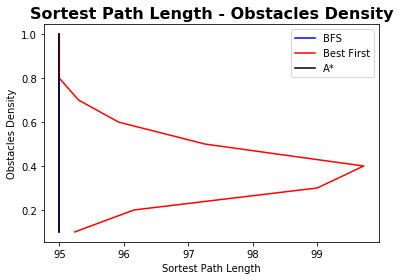

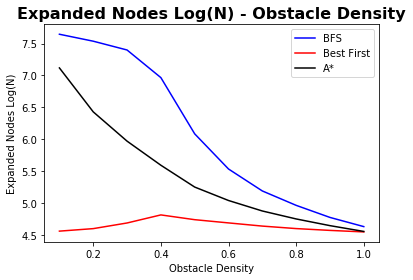

In [35]:
#Plots
bfs = []
bestf = []
astar = []
for i in flat_list2:
    if i[0] == "BFS":
        bfs.append(i)
    elif i[0] == "Best First":
        bestf.append(i)
    else:
        astar.append(i)
        


arg1 = 2
arg2 = 3
xa, xb,xc =  normalize(bfs,arg1), normalize(bestf,arg1), normalize(astar,arg1)
ya, yb,yc =  normalize(bfs,arg2), normalize(bestf,arg2), normalize(astar,arg2)

plt.plot(xa,ya, label="BFS", color="blue")
plt.plot(xb,yb, label="Best First", color="red")
plt.plot(xc,yc, label="A*", color="black")
plt.legend(loc='upper right')
plt.title("Sortest Path Length - Obstacles Density", fontsize=16, fontweight='bold')
plt.xlabel("Sortest Path Length")
plt.ylabel("Obstacles Density")
plt.show()



# number of expanded nodes and obstacles density
# xa, xb,xc = log(getLine(bfs,4)), log(getLine(bestf,4)), log(getLine(astar,4)) 
# ya, yb, yc = getLine(bfs,3), getLine(bestf,3), getLine(astar,3)


arg1 = 3
arg2 = 4
xa, xb,xc =  normalize(bfs,arg1), normalize(bestf,arg1), normalize(astar,arg1)
ya, yb,yc =  log(normalize(bfs,arg2)), log(normalize(bestf,arg2)), log(normalize(astar,arg2))

plt.plot(xa,ya, label="BFS", color="blue")
plt.plot(xb,yb, label="Best First", color="red")
plt.plot(xc,yc, label="A*", color="black")
plt.legend(loc=1)
plt.title("Expanded Nodes Log(N) - Obstacle Density", fontsize=16, fontweight='bold')
plt.ylabel("Expanded Nodes Log(N)")
plt.xlabel("Obstacle Density")
plt.show()


Στο πρώτο σχήμα παρατηρούμε ότι ο A Star με τον BFS έχουν ίδια απόδοση η οποία είνια και σταθερή (γεγονός που επιβεβαιώνει και την προηγούμενη γραφική, καθώς για grid size σταθερό βρήσκουν το βέλτιστο ανεξαρτήτου αριθμού εμποδίων) ενώ ο Best First "μπερδεύεται" και ακολουθεί μη βέλτιστα μονοπάτια, τα οποία βέβαια συγλίνουν πρός το βέλτιστο καθώς οδηγούμαστε σε μεγάλες πυκνότητες.

Στην δεύτερη γραφική παρατηρούμε ότι ξανά ο A Star είναι ο 'καλύτερος' αλγόριθμος διότι σταθερά επισκέπτεται λιγότερους κόμβους από τους άλλους 2.Βέβαια ο bfs αν και ξεκινάει όχι αποδοτικά στην συνέχεια παρατηρούμε ότι πλησιάζει τον A Star στις μεγάλες πυκνότητες εμποδίων.O Best First έχει σταθερά την χειρότερη απόδοση, ανεξαρτήτου πυκνώτητας εμποδίων.

## Παράδειγμα χρήσης της κλάσης Οπτικοποίησης

In [7]:
#Ορίζουμε τα χαρακτηριστικά του χάρτη
N = 6
S = (1, 2)
F = (4, 4)
p = 0
map = grid(N, S, F, .3) #αρχικοποίούμε τον χάρτη
#ορίζουμε το αντικείμενο που θα βρεί την βέλτιστη διαδρομή
#σε αυτό ορίζεται και ένα instance της κλάσης visualization με το όνομα vis
pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 0)
pf.vis.show_gif(fps = 2)



In [68]:
#Ορίζουμε τα χαρακτηριστικά του χάρτη
N = 6
S = (1, 2)
F = (4, 4)
p = 0
map = grid(N, S, F, .3) #αρχικοποίούμε τον χάρτη
#ορίζουμε το αντικείμενο που θα βρεί την βέλτιστη διαδρομή
#σε αυτό ορίζεται και ένα instance της κλάσης visualization με το όνομα vis
pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 0)


#σε κάθε βήμα του αλγορίθμου pathfinding θα εκτελούνται τα παρακάτω
frontier =  [(1, 3), (2, 2), (1, 1)] # θα βρίσκουμε το μέτωπο αναζήτησης
expanded_nodes =  [(1, 2)] # θα βρίσκουμε τους κόμβους που έχουν ήδη επεκταθεί
#καλούμε την παρακάτω μέθοδο για να εισάγουμε αυτό το frame στο animation
pf.vis.draw_step(map, frontier, expanded_nodes) #σχεδίαση ένος frame

# #κάνουμε το παραπάνω για κάθε βήμα της αναζήτησης
frontier =  [(1, 4), (2, 3), (2, 2), (1, 1)]
expanded_nodes =  [(1, 2), (1, 3)]
pf.vis.draw_step(map, frontier, expanded_nodes) #σχεδίαση επόμενου frame

frontier =  [(2, 4), (2, 3), (2, 2), (1, 1)]
expanded_nodes =  [(1, 2), (1, 3), (1, 4)]
pf.vis.draw_step(map, frontier, expanded_nodes) #σχεδίαση επόμενου frame

frontier =  [(3, 4), (2, 3), (2, 2), (1, 1)]
expanded_nodes =  [(1, 2), (1, 3), (2, 4), (1, 4)]
pf.vis.draw_step(map, frontier, expanded_nodes) #σχεδίαση επόμενου frame

frontier =  [(4, 4), (2, 3), (2, 2), (3, 3), (1, 1)]
expanded_nodes =  [(1, 2), (1, 3), (1, 4), (3, 4), (2, 4)]
pf.vis.draw_step(map, frontier, expanded_nodes) #σχεδίαση επόμενου frame

#εισάγουμε το Path στο animation
# path = [(1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]
# pf.vis. add_path(path)
#καλούμε την μέθοδο για να παρουσιάσουμε το animation στο Notebook
pf.vis.show_gif(fps = 1)

#αν θέλουμε μπορούμε και να το αποθηκεύσουμε τοπικά
# pf.vis.save_gif("mygif.gif")

#ή μπορούμε να παρουσιάσουμε μόνο το τελευταίο frame, όπου φαίνονται όλοι οι κόμβοι που έχουν επεκταθεί μαζί με το τελευταίο μέτωπο
#και το βέλτιστο μονοπάτι
#pf.vis.show_last_frame()